<a href="https://colab.research.google.com/github/khodid/2021WirelessCommunication/blob/main/%5B%EA%B3%BC%EC%A0%9C_5%5D_m_sequence%EC%9D%98_auto_correlation_%ED%8A%B9%EC%84%B1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제: Shift register 5개를 사용하는 m-sequence를 생성하고, 3주기 동안의 auto-correlation 그래프를 그리시오.

- Generator polynomal g(x) = 1 + x^2 + x^5

- 초기값은 임의로 설정하시오.

- auto-correlation은 다음의 normalized auto-correlation식을 이용한다.

보고서 형식:

- 학번, 이름, 그래프 (normalized auto-correlation 그래프 - 3주기)

- 본인의 구현 방법과 분석 보고서: 폰트 10의 순수한 텍스트로 1페이지 이상

- 부록 부분에는,  m-sequence 생성 코드와  k값에 따른 normalized auto-correlation 값에 대한 생성 코드를 추가하시오.

(입력으로 초기 상태 비트 5자리를 입력받고, m-sequence 비트 패턴과  1주기 동안의 normalized auto-correlation 값을 차례로 출력)

* 프로그래밍이 어려운 학생은 부록에 m-sequence를 생성하는 과정을 표로 추가하세요.

In [16]:
# 1 2 3 4 5
#   1     1
import numpy as np
import matplotlib.pyplot as plt


def gen(reg):
    return reg[1] ^ reg[4]

def n_auto_cor(code, k):
    c = []
    Nc = len(code)
    for i in range(Nc):
        a = 1 if code[i] is 1 else -1
        b = 1 if code[(i+k)%Nc] is 1 else -1
        c.append(a*b)
    return 1/Nc*sum(c)

def shift(reg):
    a, b, c, d, e = reg           # 
    reg = [gen(reg), a, b, c, d]
    return reg

# 통합 코드
def mseq(init):
    reg = init
    code = []
    N_c = 2**len(init) - 1
    
    # 코드 얻기
    while True:
        code.append(reg[-1])    # 마지막 레지스터의 값을 code에 추가
        reg = shift(reg)        # 레지스터 shift
        if reg == init: break   # 초기 상태로 돌아오면 반복 멈춤
    print(f'm-sequence: {code}, length: {len(code)}')
    
    # 한 주기에 대해 Auto-correlation 구하기
    cor = []
    for i in range(N_c):
        cor.append(n_auto_cor(code, i))
    print(f'Normalized-auto-correlation: {cor}')

    # 그래프로 표시하기
    plt.figure(figsize=(15, 6))
    plt.stem(cor)
    plt.title('Normalized auto-correlation')
    plt.xticks(np.arange(0, N_c), rotation = 45)
    plt.show()
    return code, cor

m-sequence: [0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1], length: 31
Normalized-auto-correlation: [1.0, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903, -0.03225806451612903]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


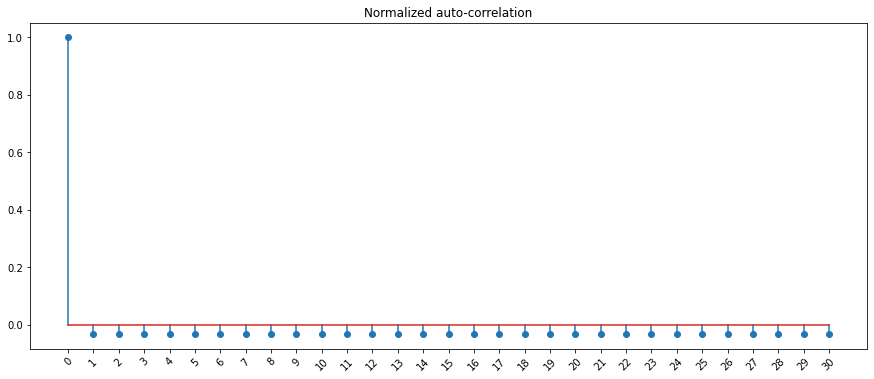

In [17]:
code, cor = mseq([0, 1, 1, 0, 0])

# shift 과정 확인하면서 코드 생성하기

In [30]:
reg = [1, 0, 1, 0, 0] # 초기 상태
c = reg
code = []
i = 0
while True:
    print(f'register 상태: {c}')
    code.append(c[-1])
    c = shift(c)
    i = i + 1
    if c == reg: break
    if i > 50: break
print(f'm-sequence {code} 의 주기: {i}')
N_c = i

register 상태: [1, 0, 1, 0, 0]
register 상태: [0, 1, 0, 1, 0]
register 상태: [1, 0, 1, 0, 1]
register 상태: [1, 1, 0, 1, 0]
register 상태: [1, 1, 1, 0, 1]
register 상태: [0, 1, 1, 1, 0]
register 상태: [1, 0, 1, 1, 1]
register 상태: [1, 1, 0, 1, 1]
register 상태: [0, 1, 1, 0, 1]
register 상태: [0, 0, 1, 1, 0]
register 상태: [0, 0, 0, 1, 1]
register 상태: [1, 0, 0, 0, 1]
register 상태: [1, 1, 0, 0, 0]
register 상태: [1, 1, 1, 0, 0]
register 상태: [1, 1, 1, 1, 0]
register 상태: [1, 1, 1, 1, 1]
register 상태: [0, 1, 1, 1, 1]
register 상태: [0, 0, 1, 1, 1]
register 상태: [1, 0, 0, 1, 1]
register 상태: [1, 1, 0, 0, 1]
register 상태: [0, 1, 1, 0, 0]
register 상태: [1, 0, 1, 1, 0]
register 상태: [0, 1, 0, 1, 1]
register 상태: [0, 0, 1, 0, 1]
register 상태: [1, 0, 0, 1, 0]
register 상태: [0, 1, 0, 0, 1]
register 상태: [0, 0, 1, 0, 0]
register 상태: [0, 0, 0, 1, 0]
register 상태: [0, 0, 0, 0, 1]
register 상태: [1, 0, 0, 0, 0]
register 상태: [0, 1, 0, 0, 0]
m-sequence [0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [20]:
print(code)
print(N_c)
print(len(code))

[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0]
31
31


# Normalized Auto Correlation 구하기

In [21]:
cor = []
for i in range(N_c*3):
    cor.append(n_auto_cor(code, i))

# 3주기에 대해 Normalized Auto Correlation 그리기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


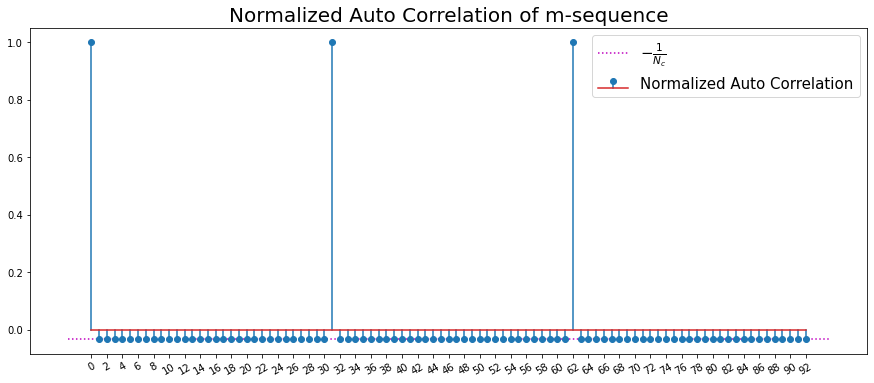

In [24]:
%matplotlib inline
plt.figure(figsize=(15, 6))
plt.title('Normalized Auto Correlation of m-sequence', fontsize = 20)
plt.stem(cor, label = 'Normalized Auto Correlation')
plt.xticks(np.arange(0, 3*N_c, step = 2), rotation =30)
# plt.xticks([0, 31, 62], ['0', r'$N_c$', r'$2N_c$'])  # Set text labels.
# plt.hlines(y = 0, xmin = 0, xmax = 92, colors = 'k')
plt.hlines(y = -1/N_c, xmin = -3, xmax = 95, colors = 'm', linestyles=':', label=r'$-\frac{1}{N_c}$')
# plt.vlines(x = [0, 31, 62], ymin = -1/N_c, ymax = 1, linestyles=':'),
plt.legend(fontsize = 15)
plt.show()

In [25]:
# 생성된 m-sequence
print(code)

[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0]
